<a href="https://colab.research.google.com/github/sergiimakhin/Project_DA/blob/master/Immo_Scout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - Intro to Analytical Thinking

---
## The description:
We will go back to the Berlin rental prices dataset.

Apply the methodology you learned in the last lecture and today to answer the following questions. On top of writing the code, please specifiy your analytical approach.

Suppose you are an analytics consultant and your client is the Senate of Berlin, looking to draft policy suggestions to **help make rent more affordable in the city.** While they have not (yet) asked you for a recommendation, they need to **understand the market's current state.**

For that, you are asked:

1. Is there a shortage of *affordable* apartments in Berlin in general, or is the issue concentrated in select neighbourhoods? (**hint**: you need to define the term "affordable" based on your own criteria first, before analyzing the number of apartments)

2. `Additional question`: A few companies are exploring *apartment renovation* as a viable business model — what impact could this practice have on the availability of *affordable* apartments?


---
## The dataset:
You all know this one already but to recap, this is a list of rental apartments in Berlin. One row is for one appartment. The dataset contains 6 columns.
- Region: is the Berlin district, where the flat is located
- Condition: is the condition of the flat
- Rooms: The number of rooms the flat has
- Rent: Monthly rent for the flat
- Year_Construction: The year in which the house was build
- Space: The size of the flat in square meters

As you dive into this analysis, please remember that this is a scraped **snapshot** of the marketplace (there's no time dimension in this dataset).

---
## The Task:

For each of the two questions:
1. Define the term in the question that seem ambiguous
2. Break down the question into smaller questions that can be answered with an analysis as we have studied (**hint** see lecture slides: What plot fits to what analysis?)
3. Build a few plots or other types of analyses to answer the questions
4. Write a conclusion (addressing the Senate of Berlin) explaining the answer to the question

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the dataset
df = pd.read_csv('https://raw.githubusercontent.com/juliandnl/redi_ss20/master/berlin_rental.csv')
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space
0,Mitte,first_time_use,4.0,2659.00,2019,117.20
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33
2,Köpenick,well_kept,2.0,979.00,1997,83.61
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27


An apartment is often considered affordable if the rent and utility costs are a reasonable proportion of a person's income. A common benchmark is that housing costs should not exceed 30% of a household's gross income.
The average salary for jobs in Berlin, Germany is 55.571 € (EUR) per year.


In [ ]:
# Calculating the affordable appartment rent price in Berlin

aff_app_rent = 0.3 * 55571 / 12
print(f'\nThe affordable appartment rent price in Berlin equals {round(aff_app_rent, 1)} Euro.')


The affordable appartment rent price in Berlin equals 1389.3 Euro.


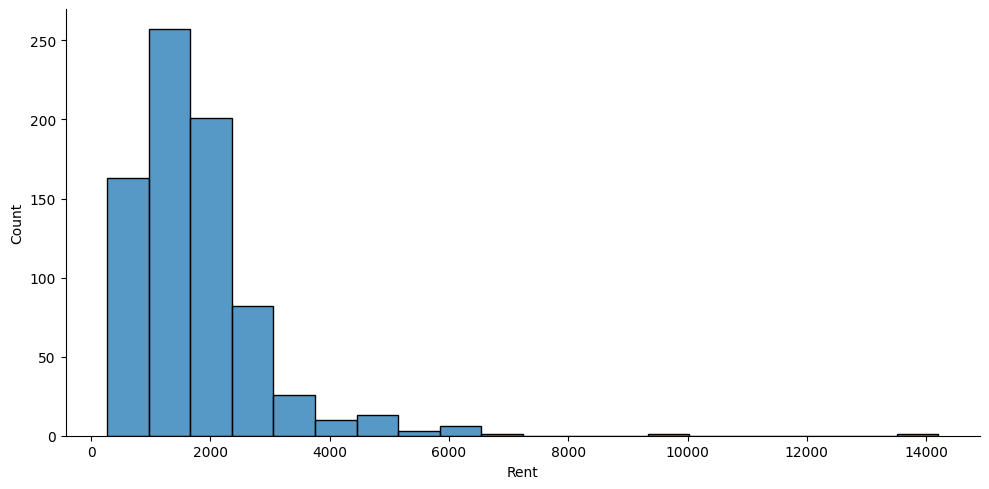

In [ ]:
sns.displot(x = df.Rent, bins=20, aspect=2)

In [ ]:
# calculating the descriptive statistics for the column Rent

rent_stat = df.Rent.describe().round(1)
print(rent_stat)

count      764.0
mean      1768.6
std       1118.3
min        271.2
25%       1039.5
50%       1565.5
75%       2170.0
max      14207.0
Name: Rent, dtype: float64


In [ ]:
# calculating the Rent's Interquartile Range and Outliers

IQR = rent_stat[6] - rent_stat[4]
outlier_lo = rent_stat[4] - 1.5 * IQR
outlier_hi = rent_stat[6] + 1.5 * IQR
print (f'\nThe lower outlier value for Rent equals {outlier_lo} Euro.')
print (f'\nThe higher outlier value for Rent equals {outlier_hi} Euro.\n')


The lower outlier value for Rent equals -656.25 Euro.

The higher outlier value for Rent equals 3865.75 Euro.



In [ ]:
# creating a filtered dataframe without outliers in the column Rent

df_filtered = df[df.Rent <= outlier_hi]
rent_filtered_stat = df_filtered.Rent.describe().round(1)
print(rent_filtered_stat)

count     730.0
mean     1601.2
std       715.1
min       271.2
25%      1001.8
50%      1526.1
75%      2078.4
max      3780.0
Name: Rent, dtype: float64


<Axes: xlabel='Region', ylabel='Rent'>

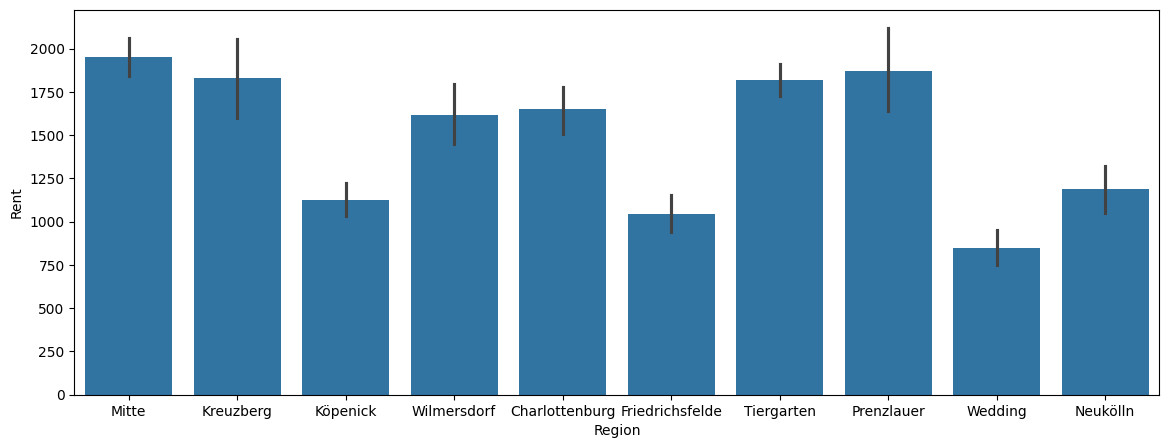

In [ ]:
plt.figure(figsize=(14, 5))
sns.barplot(data=df_filtered, x='Region', y='Rent')

In [ ]:
# counting the number of rent offers in each Berlin's region
# we could use such methods as .count() or .size()
# if a DataFrame has NaN values, count() might give unexpected results, while size() provides a simple row count.


In [ ]:
app_number_per_region = df.groupby('Region').size().sort_index(ascending=True)
print(app_number_per_region)

Region
Charlottenburg      79
Friedrichsfelde     52
Kreuzberg           47
Köpenick            55
Mitte              153
Neukölln            59
Prenzlauer          53
Tiergarten         171
Wedding             42
Wilmersdorf         53
dtype: int64


<Axes: title={'center': 'Number of Offers per Region'}, xlabel='Berlin Region', ylabel='Count of Offers'>

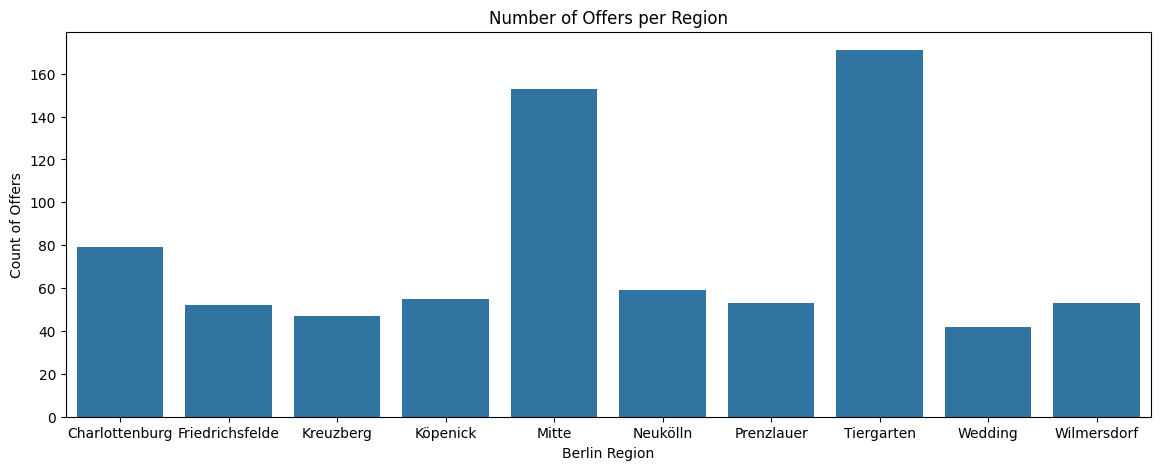

In [ ]:
plt.figure(figsize=(14, 5))
plt.xlabel("Berlin Region")
plt.ylabel("Count of Offers")
plt.title("Number of Offers per Region")
sns.barplot(x=app_number_per_region.index, y=app_number_per_region.values)


In [ ]:
# your code here
mean_rent_per_region = df.groupby('Region').Rent.mean()
print(mean_rent_per_region)

Region
Charlottenburg     1753.452532
Friedrichsfelde    1043.871731
Kreuzberg          2049.138085
Köpenick           1125.475818
Mitte              2408.725033
Neukölln           1188.114915
Prenzlauer         1996.962264
Tiergarten         1914.824795
Wedding             847.138571
Wilmersdorf        1748.646226
Name: Rent, dtype: float64


<Axes: title={'center': 'Mean Rent per Region'}, xlabel='Berlin Region', ylabel='Mean Rent'>

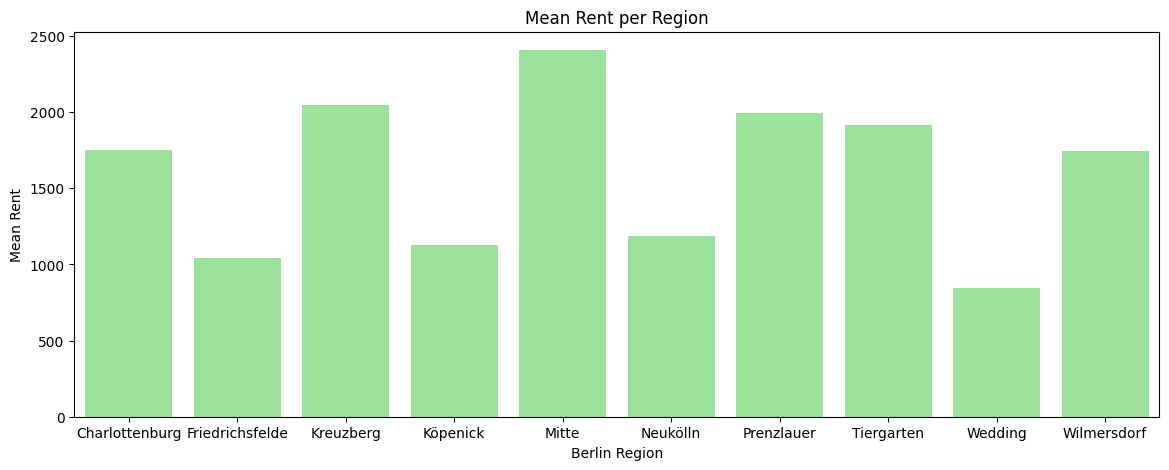

In [ ]:
plt.figure(figsize=(14, 5))
plt.xlabel("Berlin Region")
plt.ylabel("Mean Rent")
plt.title("Mean Rent per Region")
sns.barplot(x=mean_rent_per_region.index, y=mean_rent_per_region.values, color = 'lightgreen')

<Axes: xlabel='Region', ylabel='Rent'>

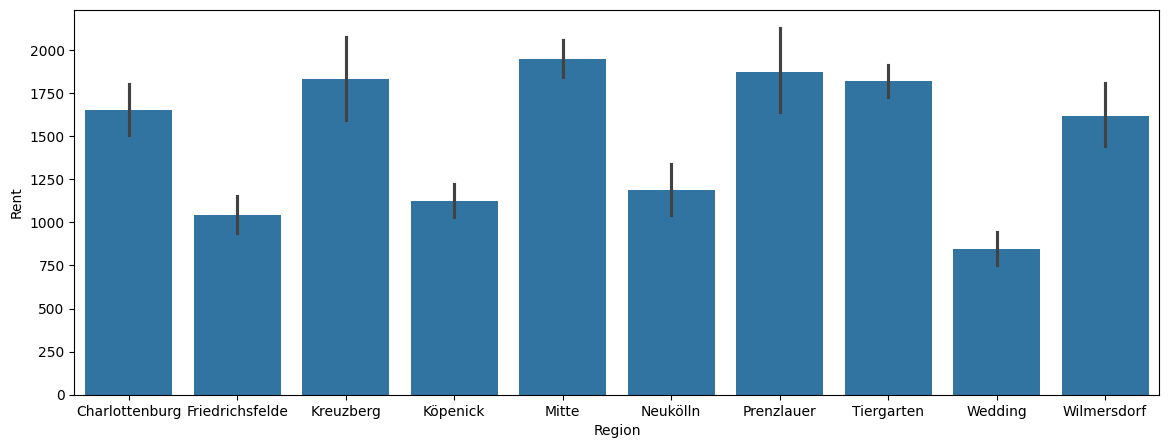

In [ ]:
df_sorted = df_filtered.sort_values(by='Region')
plt.figure(figsize=(14, 5))
sns.barplot(data=df_sorted, x='Region', y='Rent')

In [ ]:
# introducing a new column 'Affordable' with boolean values based on a specified condition

df['Affordable'] = df.Rent <= aff_app_rent
df.head()

,Region,Condition,Rooms,Rent,Year_Construction,Space,Affordable
0,Mitte,first_time_use,4.0,2659.00,2019,117.20,False
1,Kreuzberg,first_time_use,1.0,1200.00,2020,29.33,True
2,Köpenick,well_kept,2.0,979.00,1997,83.61,True
3,Wilmersdorf,well_kept,4.0,1830.22,1900,171.18,False
4,Kreuzberg,first_time_use,2.0,2272.00,2020,88.27,False


In [ ]:
# counting affordable and not affordable Rent offers

df.groupby('Affordable').size()

Affordable
False    463
True     301
dtype: int64

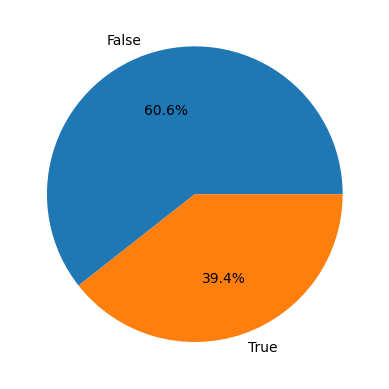

In [ ]:
# creating a Series for a pie chart

df_grouped = df.groupby('Affordable').size()
plt.pie(df_grouped.values, labels=df_grouped.index, autopct='%1.1f%%')
plt.show()

In [ ]:
# calculating the number of affordable and not affordable Rent offers grouped by each Region

df.groupby(['Region', 'Affordable']).size()

Region           Affordable
Charlottenburg   False          45
                 True           34
Friedrichsfelde  False          10
                 True           42
Kreuzberg        False          30
                 True           17
Köpenick         False          16
                 True           39
Mitte            False         135
                 True           18
Neukölln         False          21
                 True           38
Prenzlauer       False          33
                 True           20
Tiergarten       False         134
                 True           37
Wedding          False           3
                 True           39
Wilmersdorf      False          36
                 True           17
dtype: int64

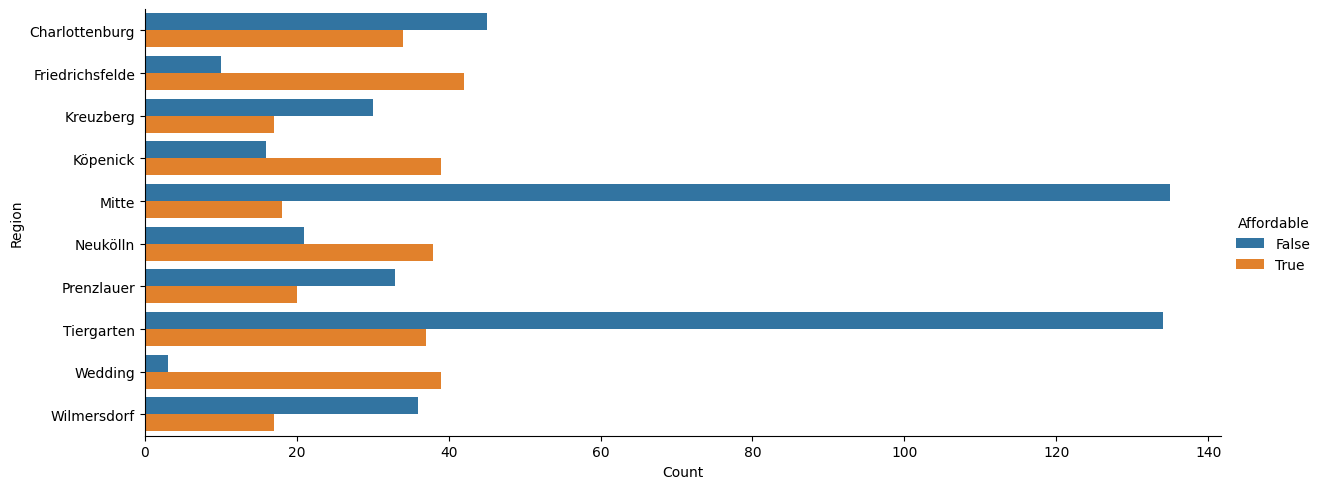

In [ ]:
# creating a flat DataFrame from a Series (grouped DataFrame), resetting the index to the default integer-based index and creating a new column 'Count'

grouped = df.groupby(['Region', 'Affordable']).size().reset_index(name='Count')
sns.catplot(data=grouped, x='Count', y='Region', hue='Affordable', kind='bar', aspect=2.5)


In [ ]:
df.Condition.value_counts()

Condition
first_time_use                        270
mint_condition                        143
no_information                        111
well_kept                              96
refurbished                            40
first_time_use_after_refurbishment     36
fully_renovated                        35
modernized                             29
need_of_renovation                      4
Name: count, dtype: int64

In [ ]:
df.groupby('Condition').Rent.mean().round(1).sort_values(ascending=False)

Condition
refurbished                           2177.3
mint_condition                        2122.2
first_time_use_after_refurbishment    1925.4
first_time_use                        1866.6
fully_renovated                       1778.3
no_information                        1544.3
well_kept                             1217.1
modernized                            1185.7
need_of_renovation                     612.3
Name: Rent, dtype: float64

In [ ]:
df_filtered.groupby('Condition').Rent.mean().round(1).sort_values(ascending=False)

Condition
first_time_use_after_refurbishment    1857.8
mint_condition                        1801.5
first_time_use                        1746.7
refurbished                           1661.0
fully_renovated                       1492.7
no_information                        1469.5
modernized                            1185.7
well_kept                             1168.1
need_of_renovation                     612.3
Name: Rent, dtype: float64

<Axes: title={'center': 'Average Rent Price per Appartment Condition'}, xlabel='Rent Price', ylabel='Appartment condition'>

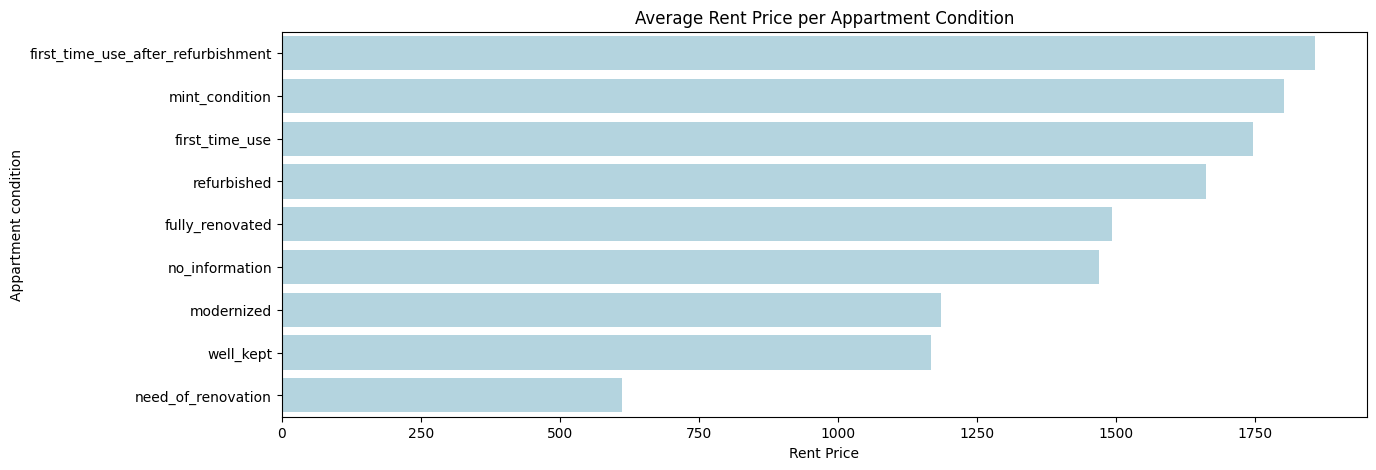

In [ ]:
df_condition = df_filtered.groupby('Condition').Rent.mean().round(1).sort_values(ascending=False)
plt.figure(figsize=(14, 5))
plt.xlabel("Rent Price")
plt.ylabel("Appartment condition")
plt.title("Average Rent Price per Appartment Condition")
sns.barplot(x = df_condition.values, y = df_condition.index, color='lightblue')

<Axes: xlabel='Rent', ylabel='Condition'>

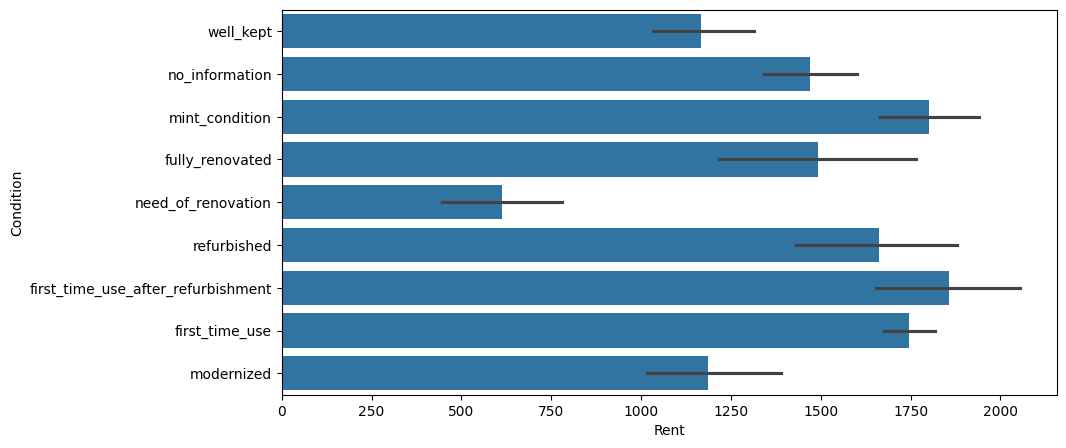

In [ ]:
df_sorted_by_Rent = df_filtered.sort_values(by='Rent')
plt.figure(figsize=(10, 5))
sns.barplot(data=df_sorted_by_Rent, y='Condition', x='Rent')